<a href="https://colab.research.google.com/github/Arkajeet7/compressor-data-analysis/blob/main/benchmarking%20model/compressor_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikeras

In [2]:
!pip install scikit-learn==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 50.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
umap-learn 0.5.9.post2 requires scikit-learn>=1.6, but you have scikit-learn 1.5.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from google.colab import files
uploaded = files.upload()

Saving aircompressor.csv to aircompressor.csv


In [5]:
data=pd.read_csv('aircompressor.csv')
data.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,78.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,76.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,77.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,80.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,79.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0,Stable


In [6]:
data['outlet_temp']+=273
data.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccy,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,351.554715,2.960632,43.166392,...,0.383773,2.649801,1.213344,1.409218,2.962484,0,0,0,0,Stable
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,349.902822,2.536711,47.342143,...,0.450954,2.669423,1.210674,1.379050,2.938135,0,0,0,0,Stable
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,350.547021,2.112789,49.306593,...,0.443924,2.772009,1.210612,1.373490,2.991878,0,0,0,0,Stable
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,353.059949,2.087534,46.886933,...,0.370457,2.876056,1.213223,1.443234,3.096158,0,0,0,0,Stable
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,352.130424,2.338877,50.498100,...,0.383868,2.849451,1.209216,1.405190,3.059417,0,0,0,0,Stable


In [7]:
def calculate_compressed_air_energy(df, pressure_col, flow_col, temp):
    # Constants
    k = 1.4
    R = 287  # J/kg.K
    T1 = df[temp] # in kelvin
    P1 = 1e5  # Pa (inlet pressure)
    air_density = 1.2  # kg/m^3

    # Convert pressure from bar to Pa
    P2 = df[pressure_col] * 1e5

    # Volumetric flow rate in m^3/min -> m^3/s
    Q = df[flow_col] / 60

    # Mass flow rate (kg/s)
    mass_flow = air_density * Q

    # Work per kg of air
    W = (k / (k - 1)) * R * T1 * ((P2 / P1) ** ((k - 1) / k) - 1)

    # Total power (J/s or Watts)
    df['output energy']= (W * mass_flow*0.2)/1000

    return df

In [8]:
data=calculate_compressed_air_energy(data, 'outlet_pressure_bar', 'air_flow', 'outlet_temp')
data.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,gaccz,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor,output energy
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,351.554715,2.960632,43.166392,...,2.649801,1.213344,1.409218,2.962484,0,0,0,0,Stable,0.000000
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,349.902822,2.536711,47.342143,...,2.669423,1.210674,1.379050,2.938135,0,0,0,0,Stable,9.738883
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,350.547021,2.112789,49.306593,...,2.772009,1.210612,1.373490,2.991878,0,0,0,0,Stable,40.647452
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,353.059949,2.087534,46.886933,...,2.876056,1.213223,1.443234,3.096158,0,0,0,0,Stable,70.520797
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,352.130424,2.338877,50.498100,...,2.849451,1.209216,1.405190,3.059417,0,0,0,0,Stable,73.683076


In [9]:
input_params=data.iloc[:,1:21]
input_params.columns

Index(['rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz'],
      dtype='object')

In [10]:
data['efficiency']=data['output energy']/data['motor_power']
data.head()

,id,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,...,haccx,haccy,haccz,bearings,wpump,radiator,exvalve,acmotor,output energy,efficiency
0,1,499,1405.842858,27.511708,1.000,308.289879,40.840517,351.554715,2.960632,43.166392,...,1.213344,1.409218,2.962484,0,0,0,0,Stable,0.000000,0.000000
1,2,513,1457.370092,31.030115,1.081,307.833736,40.484226,349.902822,2.536711,47.342143,...,1.210674,1.379050,2.938135,0,0,0,0,Stable,9.738883,0.006683
2,3,495,1582.249959,33.484653,1.369,307.377593,40.918572,350.547021,2.112789,49.306593,...,1.210612,1.373490,2.991878,0,0,0,0,Stable,40.647452,0.025690
3,4,480,1712.466820,36.394475,1.691,306.975248,40.450953,353.059949,2.087534,46.886933,...,1.213223,1.443234,3.096158,0,0,0,0,Stable,70.520797,0.041181
4,5,498,1766.035170,38.249154,1.731,306.832132,41.233739,352.130424,2.338877,50.498100,...,1.209216,1.405190,3.059417,0,0,0,0,Stable,73.683076,0.041722


In [11]:
column_names=data.columns.to_list
print(column_names)

<bound method IndexOpsMixin.tolist of Index(['id', 'rpm', 'motor_power', 'torque', 'outlet_pressure_bar', 'air_flow',
       'noise_db', 'outlet_temp', 'wpump_outlet_press', 'water_inlet_temp',
       'water_outlet_temp', 'wpump_power', 'water_flow', 'oilpump_power',
       'oil_tank_temp', 'gaccx', 'gaccy', 'gaccz', 'haccx', 'haccy', 'haccz',
       'bearings', 'wpump', 'radiator', 'exvalve', 'acmotor', 'output energy',
       'efficiency'],
      dtype='object')>


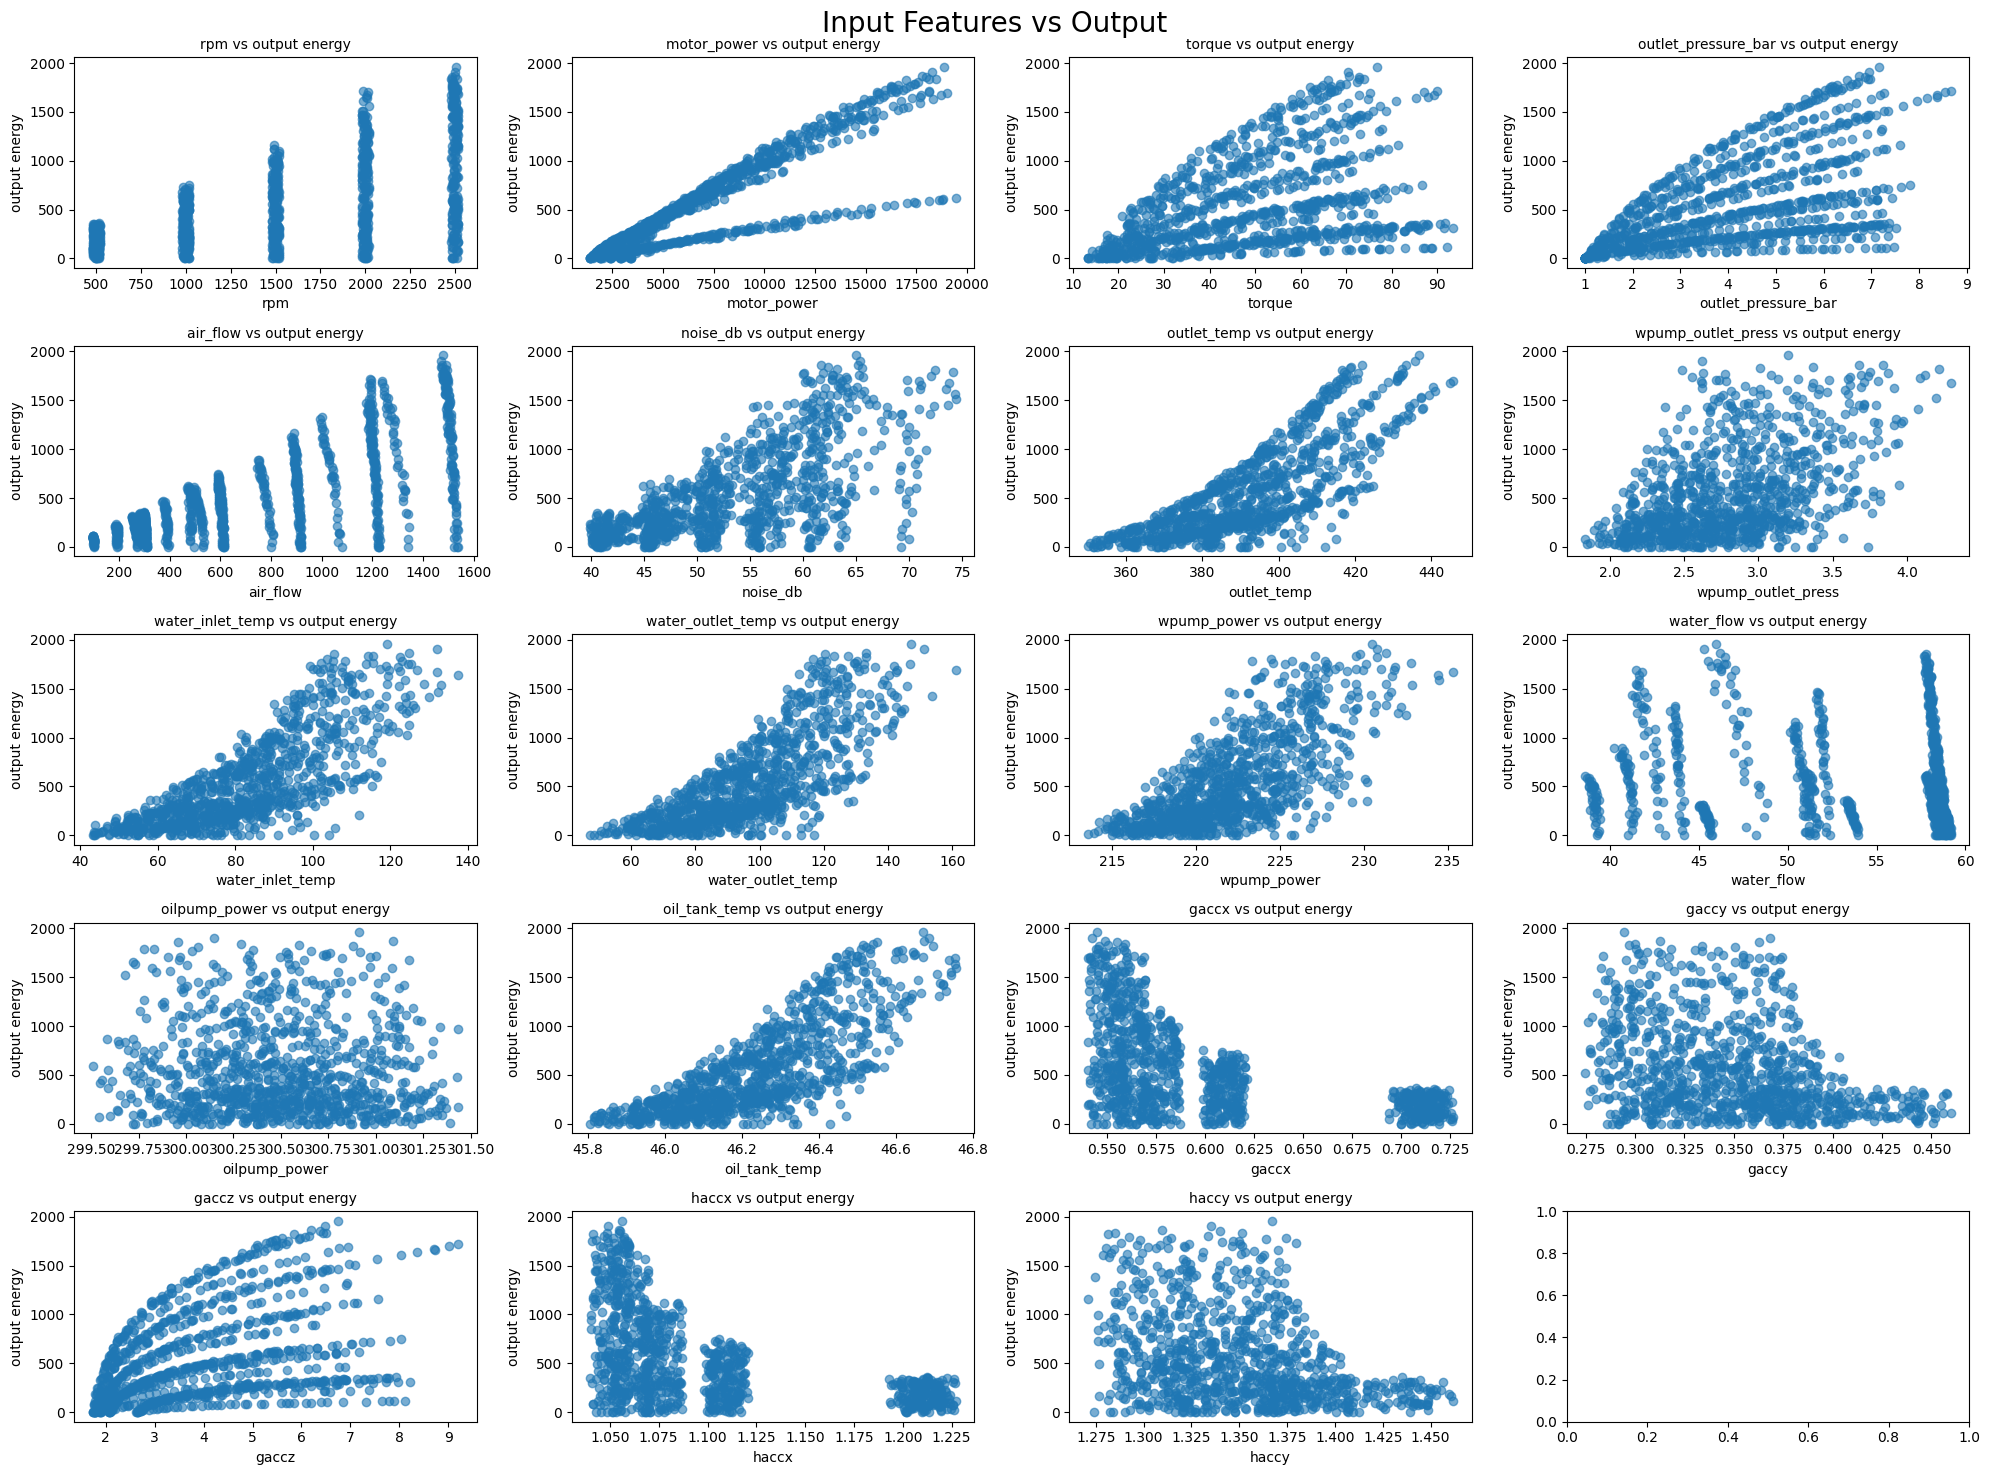

In [12]:
output_col = 'output energy'  # Change this to your actual output column name
input_cols = [col for col in data.iloc[:,1:20].columns if col != output_col]

rows, cols = 5, 4  # 5x4 grid for 20 inputs
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))
fig.suptitle('Input Features vs Output', fontsize=20)

# Flatten the axes array to iterate through each subplot
for i, col in enumerate(input_cols):
    ax = axes.flatten()[i]  # Get the individual Axes object
    ax.scatter(data[col], data[output_col], alpha=0.6)
    ax.set_title(f'{col} vs {output_col}', fontsize=10)
    ax.set_xlabel(col)
    ax.set_ylabel(output_col)

plt.tight_layout()
plt.show()

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1000 non-null   int64  
 1   rpm                  1000 non-null   int64  
 2   motor_power          1000 non-null   float64
 3   torque               1000 non-null   float64
 4   outlet_pressure_bar  1000 non-null   float64
 5   air_flow             1000 non-null   float64
 6   noise_db             1000 non-null   float64
 7   outlet_temp          1000 non-null   float64
 8   wpump_outlet_press   1000 non-null   float64
 9   water_inlet_temp     1000 non-null   float64
 10  water_outlet_temp    1000 non-null   float64
 11  wpump_power          1000 non-null   float64
 12  water_flow           1000 non-null   float64
 13  oilpump_power        1000 non-null   float64
 14  oil_tank_temp        1000 non-null   float64
 15  gaccx                1000 non-null   fl

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Scaler for input features
input_scaler = StandardScaler()
x = input_scaler.fit_transform(input_params)
x = pd.DataFrame(x, columns=input_params.columns)

# Scaler for output features
output_scaler = StandardScaler()
y = output_scaler.fit_transform(data.iloc[:,[-2,-1]])
y = pd.DataFrame(y, columns=['output energy','efficiency'])

y.head()

,output energy,efficiency
0,-1.178515,-2.214685
1,-1.157705,-2.003652
2,-1.091662,-1.403406
3,-1.027831,-0.914195
4,-1.021074,-0.897095


In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold
from scikeras.wrappers import KerasClassifier,KerasRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

def build_model():
    model = Sequential([
        Dense(64, input_dim=20, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.2),
        Dense(2)  # for 2 output variables (regression)
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

In [17]:
regressor = KerasRegressor(
    model=build_model,
    epochs=100,
    batch_size=32,
    verbose=0
)

cv = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(regressor, x, y, cv=cv, scoring='r2')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [18]:
r2_scores = scores
print("MSE scores per fold:",r2_scores)
print("Mean MSE:", np.mean(r2_scores))

MSE scores per fold: [0.98706901 0.98437554 0.98152649 0.98181498 0.98016346]
Mean MSE: 0.9829898953437806


In [19]:
def generate_random_input(df, n_samples):
    """
    Generate random input data between min and max of each column.

    Parameters:
    - df: pandas DataFrame (only input features)
    - n_samples: number of random rows to generate

    Returns:
    - random_df: DataFrame of shape (n_samples, n_features)
    """
    random_data = {
        col: np.random.uniform(df[col].min(), df[col].max(), size=n_samples)
        for col in df.columns
    }
    random_df = pd.DataFrame(random_data)
    return random_df

In [20]:
plotting_data=generate_random_input(x,200)

# Inverse transform the scaled input data using the input_scaler
x_input = input_scaler.inverse_transform(plotting_data)
x_input = pd.DataFrame(x_input, columns=plotting_data.columns)

# Fit the regressor on the training data
regressor.fit(x_train, y_train)

# Predict on the scaled input data
y_pred_arr = regressor.predict(plotting_data)

# Inverse transform the predicted output data using the output_scaler
y_pred_arr_original_scale = output_scaler.inverse_transform(y_pred_arr)
y_pred = pd.DataFrame(y_pred_arr_original_scale, columns=['output energy', 'efficiency'])

model_data_regressor=pd.concat([x_input,y_pred],axis=1)
model_data_regressor.head()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,oilpump_power,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz,output energy,efficiency
0,1248.394598,12775.907210,56.078914,7.708918,976.915526,54.766053,434.408481,2.524701,77.918289,157.596610,...,299.997174,46.019360,0.680943,0.327402,3.467778,1.193658,1.381117,3.196821,1496.365356,0.118456
1,2260.059066,16884.214789,80.535722,2.883383,1156.965196,48.687323,438.161376,2.274390,43.284192,69.683550,...,299.701536,46.257914,0.721119,0.363823,7.815305,1.125748,1.414582,5.823439,1062.566406,0.079774
2,572.907222,5913.435277,69.105437,2.226236,922.290307,64.907704,441.072291,3.623787,119.423102,72.660274,...,300.104239,46.544383,0.592257,0.306518,8.580316,1.142230,1.437311,4.801579,547.074768,0.062507
3,1911.536033,3852.475675,22.068092,3.010961,612.750778,58.850466,436.878390,3.508646,125.238984,108.678583,...,300.953799,46.714937,0.703990,0.428917,6.737418,1.063573,1.362433,4.962641,-123.582611,-0.028876
4,587.815761,16807.371140,50.969325,6.696834,543.371458,46.071436,429.473641,4.065139,125.355570,127.404911,...,299.580898,46.147307,0.580636,0.373016,8.028043,1.043638,1.456719,5.862924,947.029053,0.077405


In [21]:
model_data_regressor = model_data_regressor[model_data_regressor['efficiency'] >= 0]
model_data_regressor.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,oilpump_power,oil_tank_temp,gaccx,gaccy,gaccz,haccx,haccy,haccz,output energy,efficiency
0,1248.394598,12775.907210,56.078914,7.708918,976.915526,54.766053,434.408481,2.524701,77.918289,157.596610,...,299.997174,46.019360,0.680943,0.327402,3.467778,1.193658,1.381117,3.196821,1496.365356,0.118456
1,2260.059066,16884.214789,80.535722,2.883383,1156.965196,48.687323,438.161376,2.274390,43.284192,69.683550,...,299.701536,46.257914,0.721119,0.363823,7.815305,1.125748,1.414582,5.823439,1062.566406,0.079774
2,572.907222,5913.435277,69.105437,2.226236,922.290307,64.907704,441.072291,3.623787,119.423102,72.660274,...,300.104239,46.544383,0.592257,0.306518,8.580316,1.142230,1.437311,4.801579,547.074768,0.062507
4,587.815761,16807.371140,50.969325,6.696834,543.371458,46.071436,429.473641,4.065139,125.355570,127.404911,...,299.580898,46.147307,0.580636,0.373016,8.028043,1.043638,1.456719,5.862924,947.029053,0.077405
5,1671.614882,16741.713645,57.805472,6.632576,1495.593856,65.127049,350.234454,4.232254,99.472585,114.213299,...,300.398350,46.268787,0.602993,0.411631,5.305723,1.121391,1.298900,6.053149,1536.553101,0.101333


CLASSIFICATION PROBLEM :

In [23]:
y_class=data.iloc[:,[-4,-5,-6,-7]]
y_binary = y_class.idxmax(axis=1)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_binary = le.fit_transform(y_binary)

y_class.iloc[:,3].unique()

array([0, 1])

In [24]:
from sklearn.model_selection import train_test_split

x_train_class,x_test_class,y_train_class,y_test_class=train_test_split(x,y_class,test_size=0.2,random_state=42)

In [25]:
input_dim = x.shape[1]
output_dim = y_class.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_shape=(input_dim,)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(output_dim, activation='sigmoid')  # sigmoid for multi-label
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',   # For multi-label classification
    metrics=['accuracy']
)
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,556 (13.89 KB)

 Trainable params: 3,556 (13.89 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    x_train_class, y_train_class.values,       # X = input features, y_class = DataFrame of binary outputs
    epochs=50,
    batch_size=32,
    validation_split=0.2,    # Use 20% of data for validation
    verbose=1
)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3403 - loss: 0.7518 - val_accuracy: 0.4375 - val_loss: 0.5697
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3706 - loss: 0.5826 - val_accuracy: 0.5500 - val_loss: 0.4959
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3807 - loss: 0.5222 - val_accuracy: 0.5938 - val_loss: 0.4554
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4725 - loss: 0.4885 - val_accuracy: 0.6313 - val_loss: 0.4257
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5073 - loss: 0.4485 - val_accuracy: 0.6500 - val_loss: 0.3956
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5573 - loss: 0.4126 - val_accuracy: 0.7188 - val_loss: 0.3661
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6169 - loss: 0.3857 - val_accuracy: 0.7188 - val_loss: 0.3385
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6820 - loss: 0.3533 - val_accuracy: 0.7375 - val_los

In [28]:
from sklearn.metrics import  accuracy_score
y_pred_callf=model.predict(x_test_class)
y_pred_binary = (y_pred_callf > 0.5).astype(int)
accuracy = accuracy_score(y_test_class.values, y_pred_binary)
print("Accuracy:", accuracy)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Accuracy: 0.995


In [29]:
from matplotlib.colors import ListedColormap
colorsceme=ListedColormap(('red','blue'))

In [30]:
Y_pred_calssif_nonbinary=model.predict(x_input)
Y_pred_calssif=(Y_pred_calssif_nonbinary > 0.5).astype(int)
y_pred_class=pd.DataFrame(Y_pred_calssif,columns=y_train_class.columns)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [31]:
model_data_classifier=pd.concat([x_input,y_pred_class],axis=1)
model_data_classifier.head()

,rpm,motor_power,torque,outlet_pressure_bar,air_flow,noise_db,outlet_temp,wpump_outlet_press,water_inlet_temp,water_outlet_temp,...,gaccx,gaccy,gaccz,haccx,haccy,haccz,exvalve,radiator,wpump,bearings
0,1248.394598,12775.907210,56.078914,7.708918,976.915526,54.766053,434.408481,2.524701,77.918289,157.596610,...,0.680943,0.327402,3.467778,1.193658,1.381117,3.196821,1,0,0,0
1,2260.059066,16884.214789,80.535722,2.883383,1156.965196,48.687323,438.161376,2.274390,43.284192,69.683550,...,0.721119,0.363823,7.815305,1.125748,1.414582,5.823439,1,0,0,0
2,572.907222,5913.435277,69.105437,2.226236,922.290307,64.907704,441.072291,3.623787,119.423102,72.660274,...,0.592257,0.306518,8.580316,1.142230,1.437311,4.801579,0,0,0,0
3,1911.536033,3852.475675,22.068092,3.010961,612.750778,58.850466,436.878390,3.508646,125.238984,108.678583,...,0.703990,0.428917,6.737418,1.063573,1.362433,4.962641,1,0,0,0
4,587.815761,16807.371140,50.969325,6.696834,543.371458,46.071436,429.473641,4.065139,125.355570,127.404911,...,0.580636,0.373016,8.028043,1.043638,1.456719,5.862924,1,0,0,0


In [32]:


def scatter_subplots_for_outputs(df, input_x, input_y, output_cols, cmap=colorsceme):
    """
    Plots scatter subplots of two input parameters vs multiple outputs.

    Parameters:
        df (pd.DataFrame): DataFrame containing input and predicted output columns.
        input_x (str): Column name of input feature to use on x-axis.
        input_y (str): Column name of input feature to use on y-axis.
        output_cols (list of str): List of output column names to visualize.
        cmap (str): Colormap to use.
    """
    n_outputs = len(output_cols)
    fig, axes = plt.subplots(1, n_outputs, figsize=(5 * n_outputs, 5), constrained_layout=True)

    if n_outputs == 1:
        axes = [axes]

    for i, output_col in enumerate(output_cols):
        sc = axes[i].scatter(df[input_x], df[input_y], c=df[output_col], cmap=cmap, s=20)
        axes[i].set_title(f"{output_col} vs {input_x} & {input_y}")
        axes[i].set_xlabel(input_x)
        axes[i].set_ylabel(input_y)
        cbar = plt.colorbar(sc, ax=axes[i])
        cbar.set_label(output_col)

    plt.suptitle("Scatter Plots: Inputs vs Predicted Outputs", fontsize=16)
    plt.savefig('force comp.png')
    plt.show()
